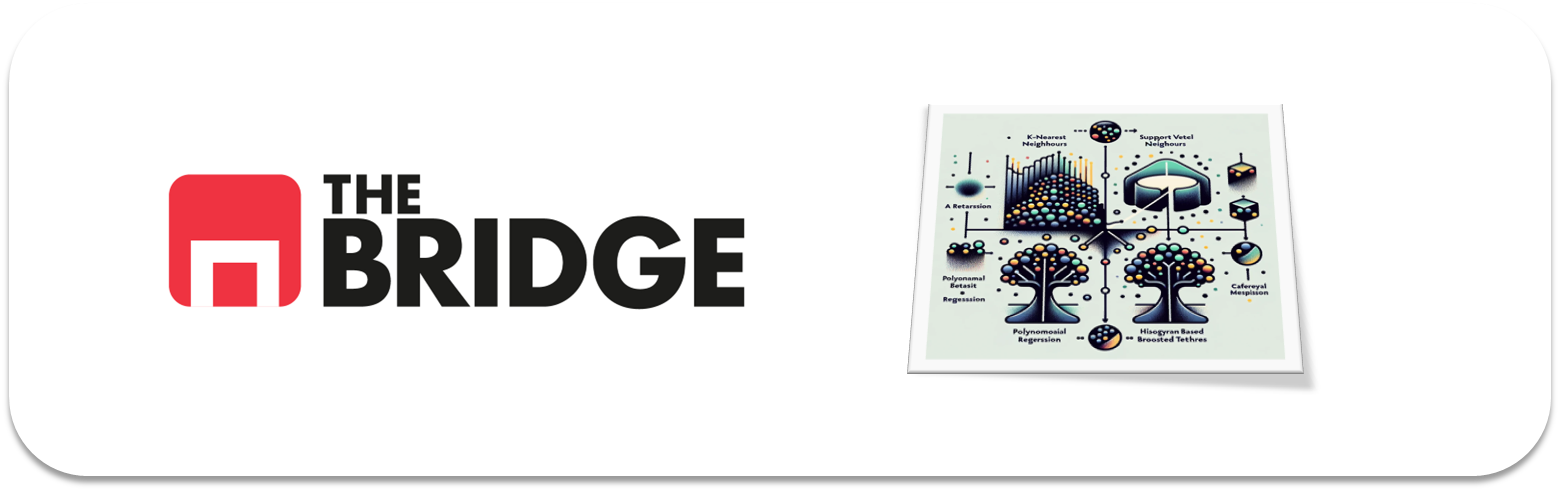

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
# Cargar el archivo subido por el usuario
wines_df = pd.read_csv('./data/wines_dataset.csv', sep = '|')

# Mostrar las primeras filas y la información general del dataset
wines_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [3]:
wines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


C:\Users\DMIN\AppData\Local\Temp\ipykernel_4028\184813970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=wines_df, palette="viridis")


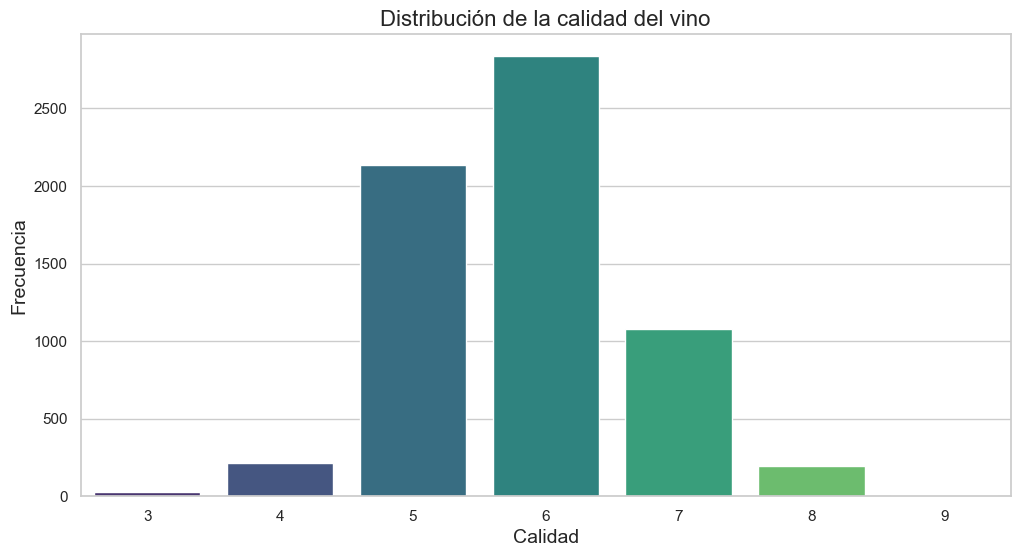

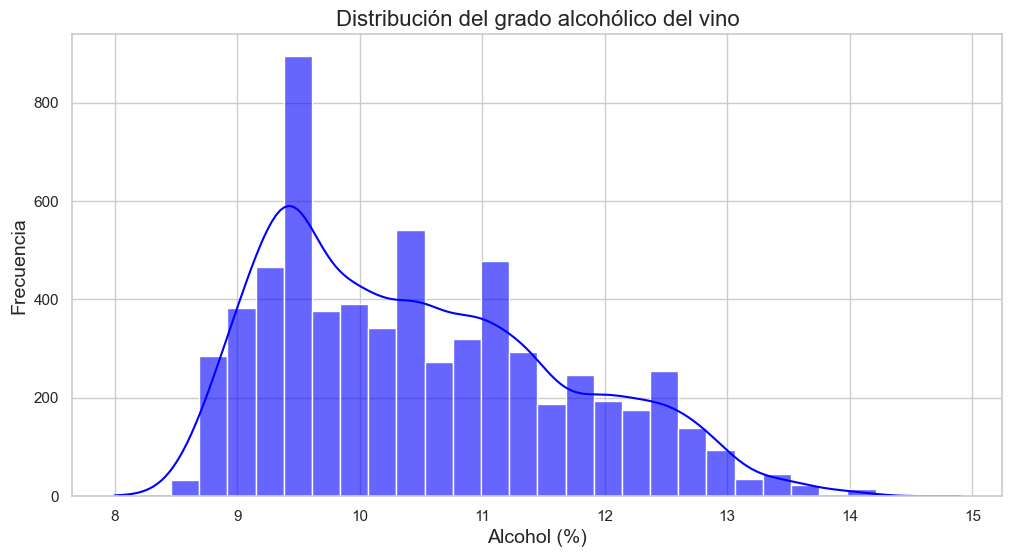

In [4]:
# Configurar el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Distribución de la calidad (clasificación)
plt.figure(figsize=(12, 6))
sns.countplot(x='quality', data=wines_df, palette="viridis")
plt.title('Distribución de la calidad del vino', fontsize=16)
plt.xlabel('Calidad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

# Distribución del alcohol (regresión)
plt.figure(figsize=(12, 6))
sns.histplot(wines_df['alcohol'], bins=30, kde=True, color="blue", alpha=0.6)
plt.title('Distribución del grado alcohólico del vino', fontsize=16)
plt.xlabel('Alcohol (%)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 81 candidates, totalling 405 fits


c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


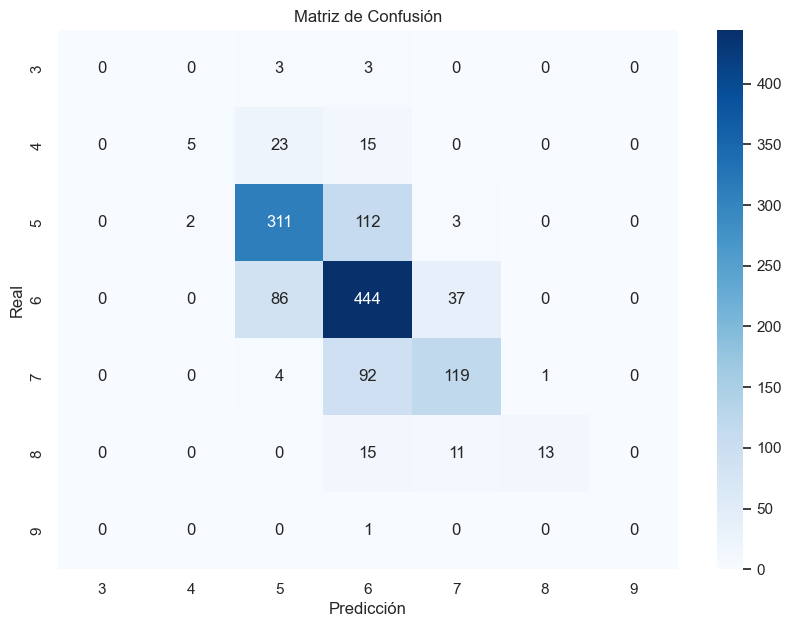


KNN (k=3):
  Score promedio (Recall): 0.2981
  Desviación estándar: 0.0468

KNN (k=5):
  Score promedio (Recall): 0.2790
  Desviación estándar: 0.0350

Árbol de decisión:
  Score promedio (Recall): 0.3525
  Desviación estándar: 0.0337

Random Forest (sin optimización):
  Score promedio (Recall): 0.3631
  Desviación estándar: 0.0333

Random Forest (optimizado):
  Mejores parámetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  Mejor Score (Recall): 0.3649
Informe de clasificación:
              precision    recall  f1-score   support

     Clase 3       0.00      0.00      0.00         6
     Clase 4       0.71      0.12      0.20        43
     Clase 5       0.73      0.73      0.73       428
     Clase 6       0.65      0.78      0.71       567
     Clase 7       0.70      0.55      0.62       216
     Clase 8       0.93      0.33      0.49        39
     Clase 9       0.00      0.00      0.00         1

    accuracy                         

c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [5]:
# Separar características y target
X = wines_df.drop(columns=["quality", "class"])
y = wines_df["quality"]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función para evaluación de modelos
def evaluate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv, scoring="recall_macro")
    return np.mean(scores), np.std(scores)

# Modelo baseline: KNN con k=3 y k=5
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_3_score, knn_3_std = evaluate_model(knn_3, X_train_scaled, y_train)
knn_5_score, knn_5_std = evaluate_model(knn_5, X_train_scaled, y_train)

# Probar otros modelos: Árboles de decisión y Random Forest
tree = DecisionTreeClassifier(random_state=42)
forest = RandomForestClassifier(random_state=42, n_estimators=100)

tree_score, tree_std = evaluate_model(tree, X_train_scaled, y_train)
forest_score, forest_std = evaluate_model(forest, X_train_scaled, y_train)

# Optimización de hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros y el desempeño del modelo optimizado
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Obtener las predicciones del modelo optimizado
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.sort(y.unique()))

# Mostrar la matriz de confusión con un mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.sort(y.unique()), yticklabels=np.sort(y.unique()))
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Generar el informe de clasificación para el modelo optimizado
class_report = classification_report(
    y_test, y_pred, target_names=[f'Clase {c}' for c in np.sort(y.unique())]
)

# Empaquetar resultados
resultados = {
    "KNN (k=3)": {
        "Score promedio (Recall)": knn_3_score,
        "Desviación estándar": knn_3_std,
    },
    "KNN (k=5)": {
        "Score promedio (Recall)": knn_5_score,
        "Desviación estándar": knn_5_std,
    },
    "Árbol de decisión": {
        "Score promedio (Recall)": tree_score,
        "Desviación estándar": tree_std,
    },
    "Random Forest (sin optimización)": {
        "Score promedio (Recall)": forest_score,
        "Desviación estándar": forest_std,
    },
    "Random Forest (optimizado)": {
        "Mejores parámetros": best_params,
        "Mejor Score (Recall)": best_score,
        "Informe de clasificación": class_report,
    },
}

# Mostrar los resultados en un formato legible
for modelo, detalles in resultados.items():
    print(f"\n{modelo}:")
    for clave, valor in detalles.items():
        if clave == "Informe de clasificación":
            print(f"{clave}:\n{valor}")
        else:
            print(f"  {clave}: {valor:.4f}" if isinstance(valor, float) else f"  {clave}: {valor}")

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

Linear Regression: RMSE = 0.5086, Std = 0.0800
Decision Tree: RMSE = 0.5794, Std = 0.0088
Random Forest: RMSE = 0.4078, Std = 0.0153
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Mejores parámetros: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor RMSE (CV): 0.4065

Evaluación en conjunto de prueba:
RMSE: 0.4012
R2: 0.8858


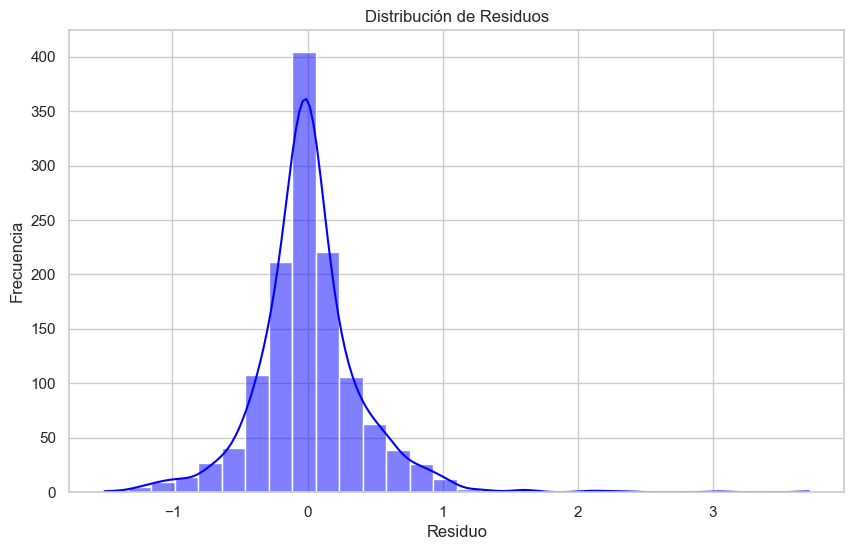

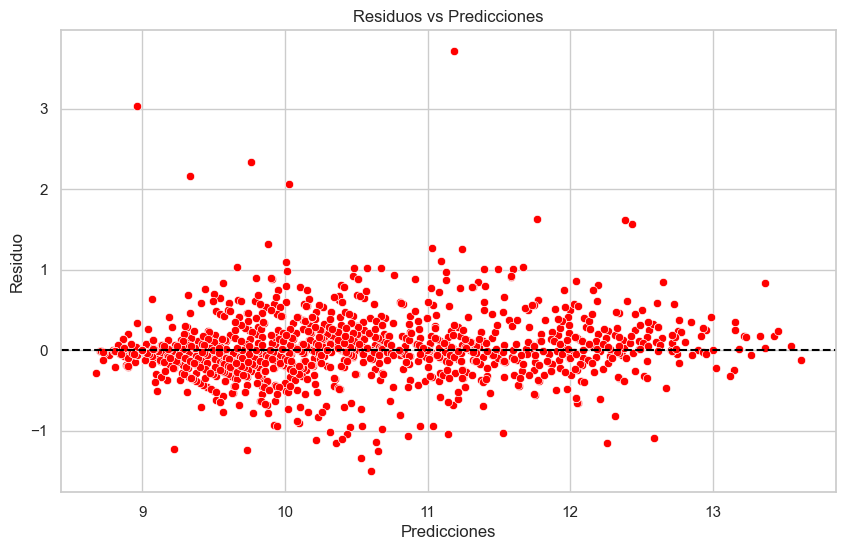

In [10]:
# 1. Separar características y target
X = wines_df.drop(columns=["alcohol"])
y = wines_df["alcohol"]

# Identificar variables categóricas y numéricas
categorical_features = ["class"]
numerical_features = X.drop(columns=categorical_features).columns.tolist()

# Crear un transformador para escalar variables numéricas y codificar variables categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Aplicar preprocesamiento a los datos
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 2. Comparación de Modelos
# Definir modelos
linear_model = LinearRegression()
tree_model = DecisionTreeRegressor(random_state=42)
forest_model = RandomForestRegressor(random_state=42, n_estimators=100)

# Evaluar modelos usando validación cruzada
def evaluate_regression_model(model, X, y, cv=5):
    mse_scores = cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error")
    rmse_scores = (-mse_scores) ** 0.5
    return np.mean(rmse_scores), np.std(rmse_scores)

linear_rmse, linear_std = evaluate_regression_model(linear_model, X_train_processed, y_train)
tree_rmse, tree_std = evaluate_regression_model(tree_model, X_train_processed, y_train)
forest_rmse, forest_std = evaluate_regression_model(forest_model, X_train_processed, y_train)

# Mostrar resultados
print(f"Linear Regression: RMSE = {linear_rmse:.4f}, Std = {linear_std:.4f}")
print(f"Decision Tree: RMSE = {tree_rmse:.4f}, Std = {tree_std:.4f}")
print(f"Random Forest: RMSE = {forest_rmse:.4f}, Std = {forest_std:.4f}")

# 3. Optimización de Hiperparámetros para Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train_processed, y_train)

# Obtener los mejores parámetros y el desempeño del modelo optimizado
best_params = grid_search.best_params_
best_rmse = (-grid_search.best_score_) ** 0.5

print("\nMejores parámetros:", best_params)
print(f"Mejor RMSE (CV): {best_rmse:.4f}")

# 4. Evaluación Final
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_processed)

test_rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nEvaluación en conjunto de prueba:")
print(f"RMSE: {test_rmse:.4f}")
print(f"R2: {r2:.4f}")

# Análisis de errores
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue", bins=30)
plt.title("Distribución de Residuos")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("Residuos vs Predicciones")
plt.xlabel("Predicciones")
plt.ylabel("Residuo")
plt.show()